In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error

In [2]:
#loading datasets
X = loadmat("Salinas_corrected.mat")["salinas_corrected"]

y = loadmat("Salinas_gt.mat")["salinas_gt"]

In [3]:
X.shape

(512, 217, 204)

In [4]:
y.shape

(512, 217)

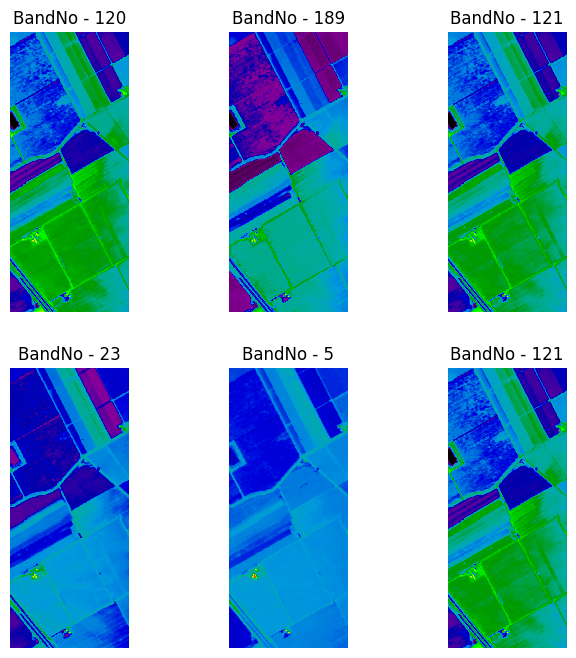

In [5]:
#plotting the bands
fig = plt.figure(figsize = (8, 8))
for i in range(1, 7):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap = "nipy_spectral")
    plt.axis("off")
    plt.title(f"BandNo - {q}")

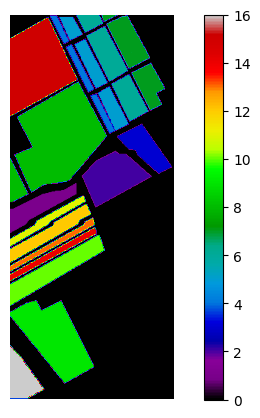

In [6]:
#visualizing groundtruth
def plot_data(X):
    fig = plt.figure(figsize = (8, 5))
    plt.imshow(X, cmap = "nipy_spectral")
    plt.colorbar()
    plt.axis("off")
    plt.show()

plot_data(y)

In [7]:
#extracting the pixels
def extract_pixels(X,y):
    
    data = X.reshape(-1, X.shape[2])
    salinas = pd.DataFrame(data = data)
    salinas = pd.concat([salinas, pd.DataFrame(data = y.ravel())], axis = 1)
    salinas.columns= [f"band{i}" for i in range(1, 1+X.shape[2])] + ["class"]
    salinas.to_csv("salinas.csv")
    return salinas

salinas = extract_pixels(X, y) 

In [8]:
salinas.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band196,band197,band198,band199,band200,band201,band202,band203,band204,class
0,290,381,585,1041,1316,1397,1319,1462,1643,1683,...,96,109,93,54,79,54,36,11,17,0
1,290,381,519,1041,1316,1352,1319,1462,1643,1683,...,94,111,96,56,83,56,36,11,15,0
2,290,381,585,1041,1286,1352,1300,1412,1614,1644,...,88,107,89,54,81,54,30,11,11,0
3,290,381,585,999,1316,1374,1280,1380,1584,1631,...,86,105,85,56,75,50,30,11,19,0
4,219,381,585,999,1286,1352,1261,1396,1555,1618,...,83,105,83,48,75,50,24,9,17,0


In [9]:
salinas.shape

(111104, 205)

In [10]:
salinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111104 entries, 0 to 111103
Columns: 205 entries, band1 to class
dtypes: int16(204), uint8(1)
memory usage: 43.3 MB


In [11]:
salinas.isnull().sum()

band1      0
band2      0
band3      0
band4      0
band5      0
          ..
band201    0
band202    0
band203    0
band204    0
class      0
Length: 205, dtype: int64

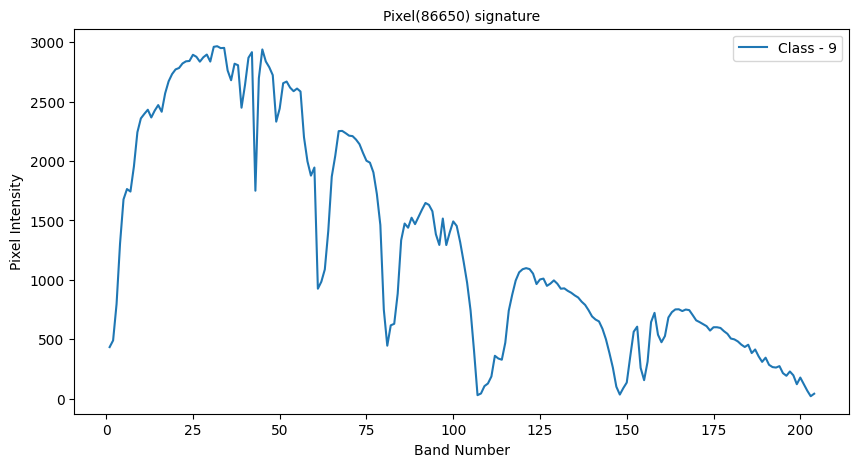

In [12]:
#visualizing spectral signatures

def plot_signature(salinas):
    plt.figure(figsize = (10, 5))
    pixel_no = np.random.randint(salinas.shape[0])
    plt.plot(range(1, 205), salinas.iloc[pixel_no, :-1].values.tolist(), label = f"Class - {salinas.iloc[pixel_no, -1]}")
    plt.legend()
    plt.title(f"Pixel({pixel_no}) signature", fontsize = 10)
    plt.xlabel("Band Number", fontsize = 10)
    plt.ylabel("Pixel Intensity", fontsize = 10)
    plt.show()

plot_signature(salinas)

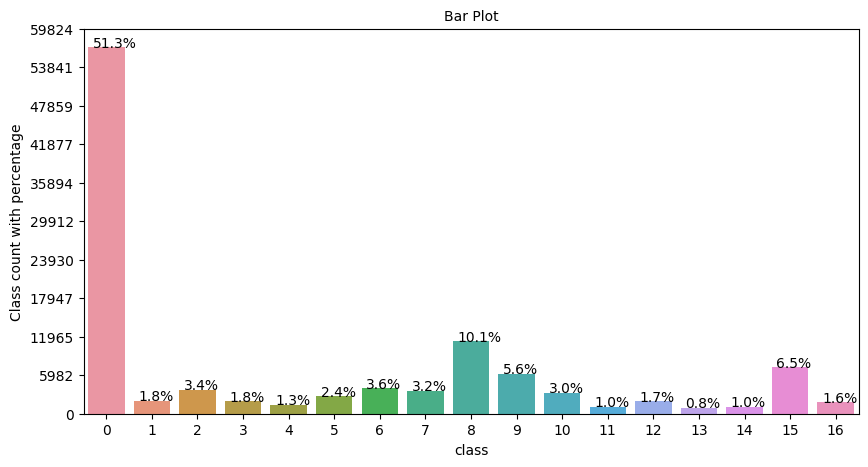

In [13]:
plt.figure(figsize = (10, 5))

ax = sns.countplot(x = "class", data = salinas[["class"]])

for p in ax.patches:
        ax.annotate("{:.1f}%".format(100*p.get_height()/salinas.shape[0]), (p.get_x()+0.1, p.get_height()+5))

        ax.yaxis.set_major_locator(ticker.LinearLocator(11))


plt.xlabel("class", fontsize = 10)
plt.ylabel("Class count with percentage", fontsize = 10)
plt.title("Bar Plot", fontsize = 10)
plt.show()

Enter the band Number(1-205) 90


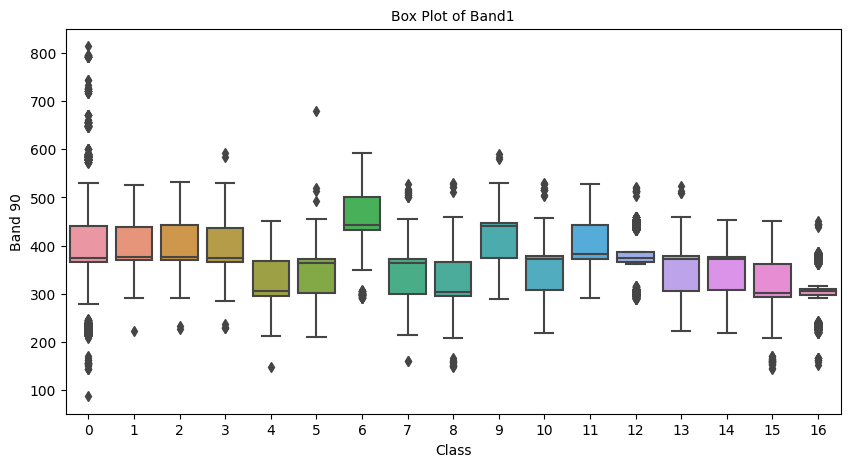

In [14]:
#box plot bands

n = int(input("Enter the band Number(1-205) "))

plt.figure(figsize = (10, 5))
sns.boxplot(x = salinas["class"], y = salinas["band1"]);
plt.title("Box Plot of Band1", fontsize = 10)
plt.xlabel("Class", fontsize = 10)
plt.ylabel(f"Band {n}", fontsize = 10)
plt.show()

C:\Users\Sobhan\AppData\Local\Temp\ipykernel_28988\2235314261.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salinas["band"+str(n)], color = "red", bins = 100, hist_kws = {"alpha": 0.4});


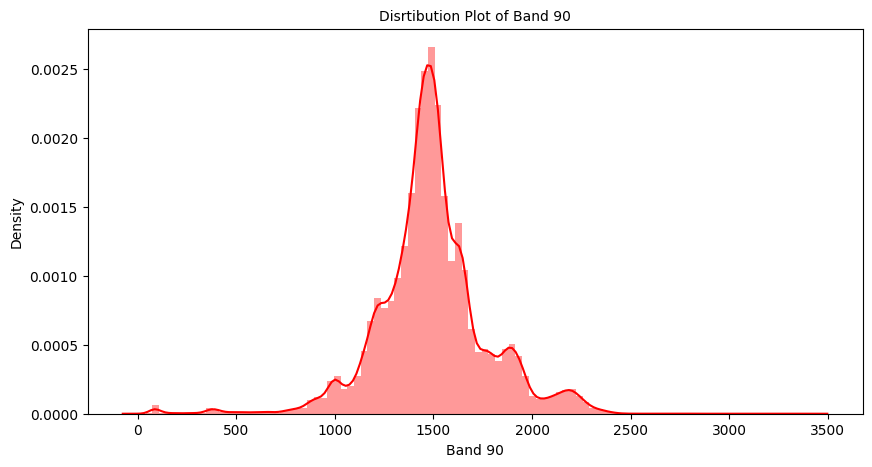

In [15]:
#distribution plot of band
plt.figure(figsize = (10, 5))
sns.distplot(salinas["band"+str(n)], color = "red", bins = 100, hist_kws = {"alpha": 0.4});
plt.xlabel("Band " +str(n), fontsize = 10)
plt.title("Disrtibution Plot of Band " +str(n), fontsize = 10)
plt.show()

In [16]:
#Principal Component Analysis(PCA)
pca = PCA(n_components = 60)

In [17]:
principalComponents = pca.fit_transform(salinas)
ev = pca.explained_variance_ratio_

In [18]:
ev

array([7.44736793e-01, 2.35313168e-01, 1.13413446e-02, 5.40388578e-03,
       1.73645381e-03, 5.49967304e-04, 2.41978928e-04, 1.46639158e-04,
       9.24989809e-05, 6.31640542e-05, 4.05614590e-05, 3.87289266e-05,
       3.32725838e-05, 2.72986160e-05, 2.39526870e-05, 1.86940253e-05,
       1.56788833e-05, 1.46078322e-05, 1.19205810e-05, 9.31670519e-06,
       7.97546936e-06, 6.25865640e-06, 5.21807733e-06, 4.55579264e-06,
       4.16474606e-06, 3.88558776e-06, 3.09836313e-06, 3.02556820e-06,
       2.86743495e-06, 2.73708015e-06, 2.51100220e-06, 2.30210088e-06,
       2.21504419e-06, 2.13115501e-06, 2.03926782e-06, 2.02146175e-06,
       1.99064583e-06, 1.94716515e-06, 1.92732192e-06, 1.88566733e-06,
       1.86447943e-06, 1.83175514e-06, 1.80899366e-06, 1.75880316e-06,
       1.72750751e-06, 1.68850669e-06, 1.63855892e-06, 1.59474860e-06,
       1.54834463e-06, 1.52329551e-06, 1.46237329e-06, 1.45622087e-06,
       1.41788772e-06, 1.40917410e-06, 1.35248195e-06, 1.31158222e-06,
      

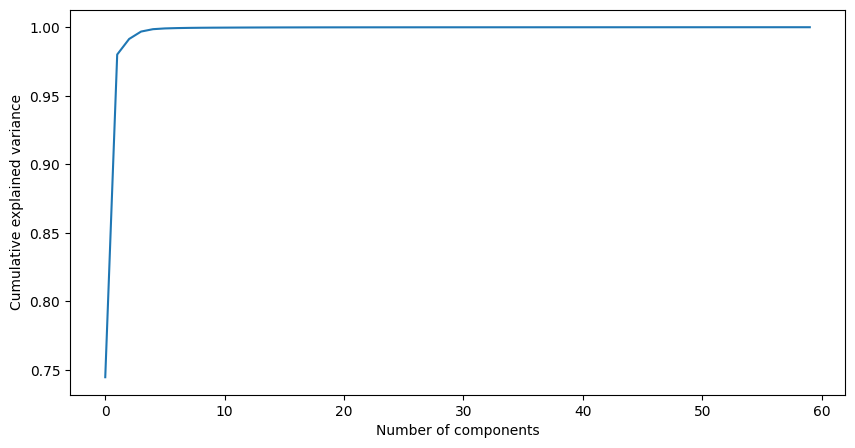

In [19]:
plt.figure(figsize = (10, 5))
plt.plot(np.cumsum(ev))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [20]:
#select 30 components for PCA

pca = PCA(n_components = 30)
data = pca.fit_transform(salinas)
salinas_data = pd.concat([pd.DataFrame(data = data), pd.DataFrame(data = y.ravel())], axis = 1)
salinas_data.columns = [f"PC-{i}" for i in range(1,31)] + ["class"]

In [21]:
salinas_data.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-22,PC-23,PC-24,PC-25,PC-26,PC-27,PC-28,PC-29,PC-30,class
0,-6136.416114,-4385.650115,628.438436,-302.086782,-7.156521,48.222143,-129.817488,-28.047898,31.902730,69.799286,...,17.629484,-9.788414,9.466037,3.755144,-4.046919,-5.679287,-3.712197,12.397190,-15.856237,0
1,-6196.987062,-4360.588788,568.301603,-269.921971,-1.906942,-13.422008,-141.530857,-48.427084,56.900391,62.905395,...,1.887989,5.211222,-14.015443,2.283776,22.461404,8.293452,-2.313541,14.025864,-17.507553,0
2,-6359.539154,-4693.891319,578.060164,-286.410678,18.374588,-17.493366,-122.465186,-23.109972,27.308715,65.004083,...,4.378421,-11.578083,-13.157991,0.955559,0.494750,-16.432186,12.037389,8.287110,-9.500537,0
3,-6583.700986,-5103.972980,630.479291,-313.784578,39.682093,-9.386509,-130.590317,-14.945124,24.473894,63.091588,...,-3.066985,-8.327969,6.773497,28.335182,-17.689851,-23.636553,7.289930,5.087570,12.174937,0
4,-6834.644971,-5385.602525,666.888487,-327.329237,24.795773,-19.604224,-134.547544,-30.852665,28.673261,83.759654,...,8.888505,-14.757640,10.666100,10.135820,-7.717419,4.056665,-12.273084,17.292203,-0.240935,0


In [22]:
# saving to .csv
salinas_data.to_csv("salinas_cnn.csv", index = False)

In [23]:
x = salinas_data[salinas_data["class"] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, "class"].values 

target_names = ["Brocoli_green_weeds_1", "Brocoli_green_weeds_2", "Fallow", "Fallow_rough_plow", "Fallow_smooth", "Stubble", "Celery", "Grapes_untrained", "Soil_vinyard_develop", "Corn_senesced_green_weeds", "Lettuce_romaine_4wk", "Lettuce_romaine_5wk", "Lettuce_romaine_6wk", "Lettuce_romaine_7wk", "Vinyard_untrained", "Vinyard_vertical_trellis"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

In [25]:
#train a linear SVM model 
model = SVC(C = 100, kernel = "rbf", cache_size = 10*1024)

In [26]:
model.fit(X_train, y_train)

SVC(C=100, cache_size=10240)

In [27]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [28]:
print("Accuracy score of the training data is: ", training_data_accuracy)

Accuracy score of the training data is:  0.9414359282266818


In [29]:
y_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_prediction, y_test)

In [30]:
print("Accuracy score of the test data is: ", test_data_accuracy)

Accuracy score of the test data is:  0.9425457232588214


In [31]:
#classification report
print("Classification Report", classification_report(y_test, y_prediction, target_names = target_names))

Classification Report                            precision    recall  f1-score   support

    Brocoli_green_weeds_1       1.00      1.00      1.00       402
    Brocoli_green_weeds_2       1.00      1.00      1.00       745
                   Fallow       0.99      1.00      1.00       395
        Fallow_rough_plow       1.00      1.00      1.00       279
            Fallow_smooth       1.00      1.00      1.00       536
                  Stubble       1.00      1.00      1.00       792
                   Celery       1.00      1.00      1.00       716
         Grapes_untrained       0.83      0.92      0.87      2254
     Soil_vinyard_develop       1.00      1.00      1.00      1241
Corn_senesced_green_weeds       0.99      0.98      0.99       656
      Lettuce_romaine_4wk       0.99      0.99      0.99       213
      Lettuce_romaine_5wk       0.99      1.00      1.00       385
      Lettuce_romaine_6wk       1.00      0.99      1.00       183
      Lettuce_romaine_7wk       1.00   

<AxesSubplot: xlabel='Predicted_Classes', ylabel='Actual_Classes'>

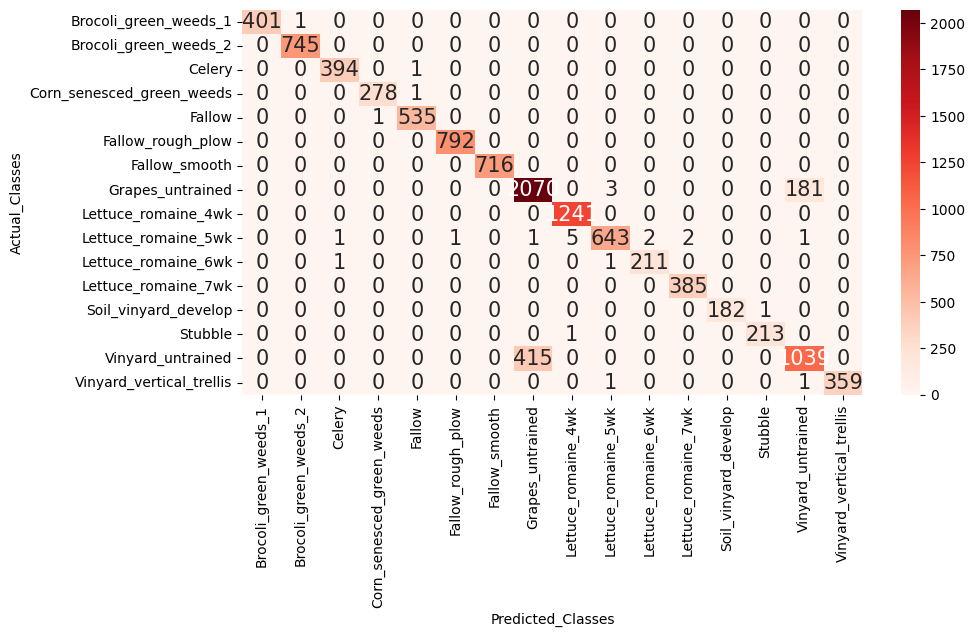

In [32]:
matrix = confusion_matrix(y_test, y_prediction)

cmatrix = pd.DataFrame(matrix, columns = np.unique(target_names), index = np.unique(target_names))

plt.figure(figsize = (10,5))
cmatrix.index.name = "Actual_Classes"
cmatrix.columns.name = "Predicted_Classes"
sns.heatmap(cmatrix, cmap = "Reds", annot = True, annot_kws = {"size": 15}, fmt = "d")

In [33]:
import math
MSE = np.square(np.subtract(y_test,y_prediction)).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: \n", RMSE)

Root Mean Square Error: 
 1.6496140992727633


In [34]:
print("Mean Absolute Error(MAE):  ", mean_absolute_error(y_test,y_prediction))

Mean Absolute Error(MAE):   9.991501939774617


In [35]:
l =[]

for i in range(salinas_data.shape[0]):
    if salinas_data.iloc[i, -1] == 0:
        l.append(0)
    else:
        l.append(model.predict(salinas_data.iloc[i, :-1].values.reshape(1, -1)))

C:\Users\Sobhan\AppData\Local\Temp\ipykernel_28988\3301324655.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clmap = np.array(l).reshape(512, 217).astype("float")


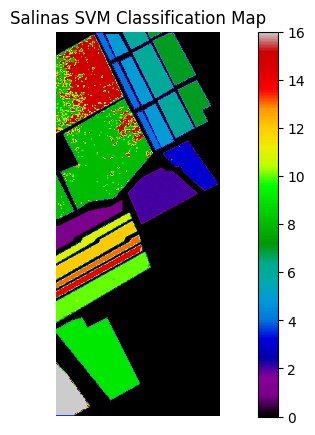

In [36]:
plt.figure(figsize = (10, 5))
clmap = np.array(l).reshape(512, 217).astype("float")
plt.imshow(clmap, cmap = "nipy_spectral")
plt.colorbar()
plt.axis("off")
plt.title("Salinas SVM Classification Map")
plt.savefig("svm_classification_map.png")
plt.show()